In [2]:
import geopandas as gpd
import numpy as np
import earthpy, descartes
import pandas as pd
from shapely import wkt
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import matplotlib.patches as mpl_patches
import math
import seaborn as sns
from minepy import MINE
from scipy.spatial import distance
import math
from scipy.stats import ks_2samp
import scipy.stats as stats
from urllib.parse import urljoin
import jenkspy
from matplotlib.colors import ListedColormap
from statistics import mean 
from scipy import stats
import functools 
from functools import reduce
import random
import statsmodels.api as sm
from scipy.stats import iqr
from collections import defaultdict
main_path = "../data/"
# sns.set()
%matplotlib inline

In [3]:
df_raw = pd.read_csv(main_path + "country_vaccinations.csv")

In [14]:
df_raw.iso_code.nunique()

58

In [8]:
vaccine_type = df_raw.vaccines.unique()

In [12]:
total_vaccination_by_country = df_raw.groupby("iso_code").agg({"country": "first",
                                                               "total_vaccinations": "sum",
                                                                "people_vaccinated": "sum",
                                                                "people_fully_vaccinated": "sum",
                                                              "daily_vaccinations_raw": "sum",
                                                               "daily_vaccinations" : "sum",
                                                               "total_vaccinations_per_hundred":"sum",
                                                               "people_vaccinated_per_hundred" : "sum",
                                                               "people_fully_vaccinated_per_hundred": "sum",
                                                               "daily_vaccinations_per_million":"sum"
                                                              }).reset_index()

In [15]:
total_vaccination_by_country  = total_vaccination_by_country.sort_values("total_vaccinations", ascending = False)

In [16]:
total_vaccination_by_country.head(1)

,iso_code,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
57,USA,United States,274807408.0,234083236.0,29163132.0,14419784.0,21271046.0,83.03,70.73,8.8,64261.0


In [23]:
def plot_individual(df, y_col, y_label, title, saveFig ,fig_name = None):
    fig, ax = plt.subplots(figsize = (35,15))
    a_font = 40
    sns.barplot(x="iso_code", y= y_col, data=df)
    plt.xlabel("Country", fontsize = a_font)
    # ax.set_xlabel('')
    plt.ylabel( y_label, fontsize = a_font)
    plt.xticks(fontsize=30,weight = 'bold')
    plt.yticks(fontsize=a_font)
    ax.tick_params(axis='x', rotation=90)
    ax.set_yscale('log')
    plt.title(title,fontsize=a_font)
    if saveFig:
        fig.savefig(main_path + 'figs/'+fig_name+'.png',bbox_inches="tight")

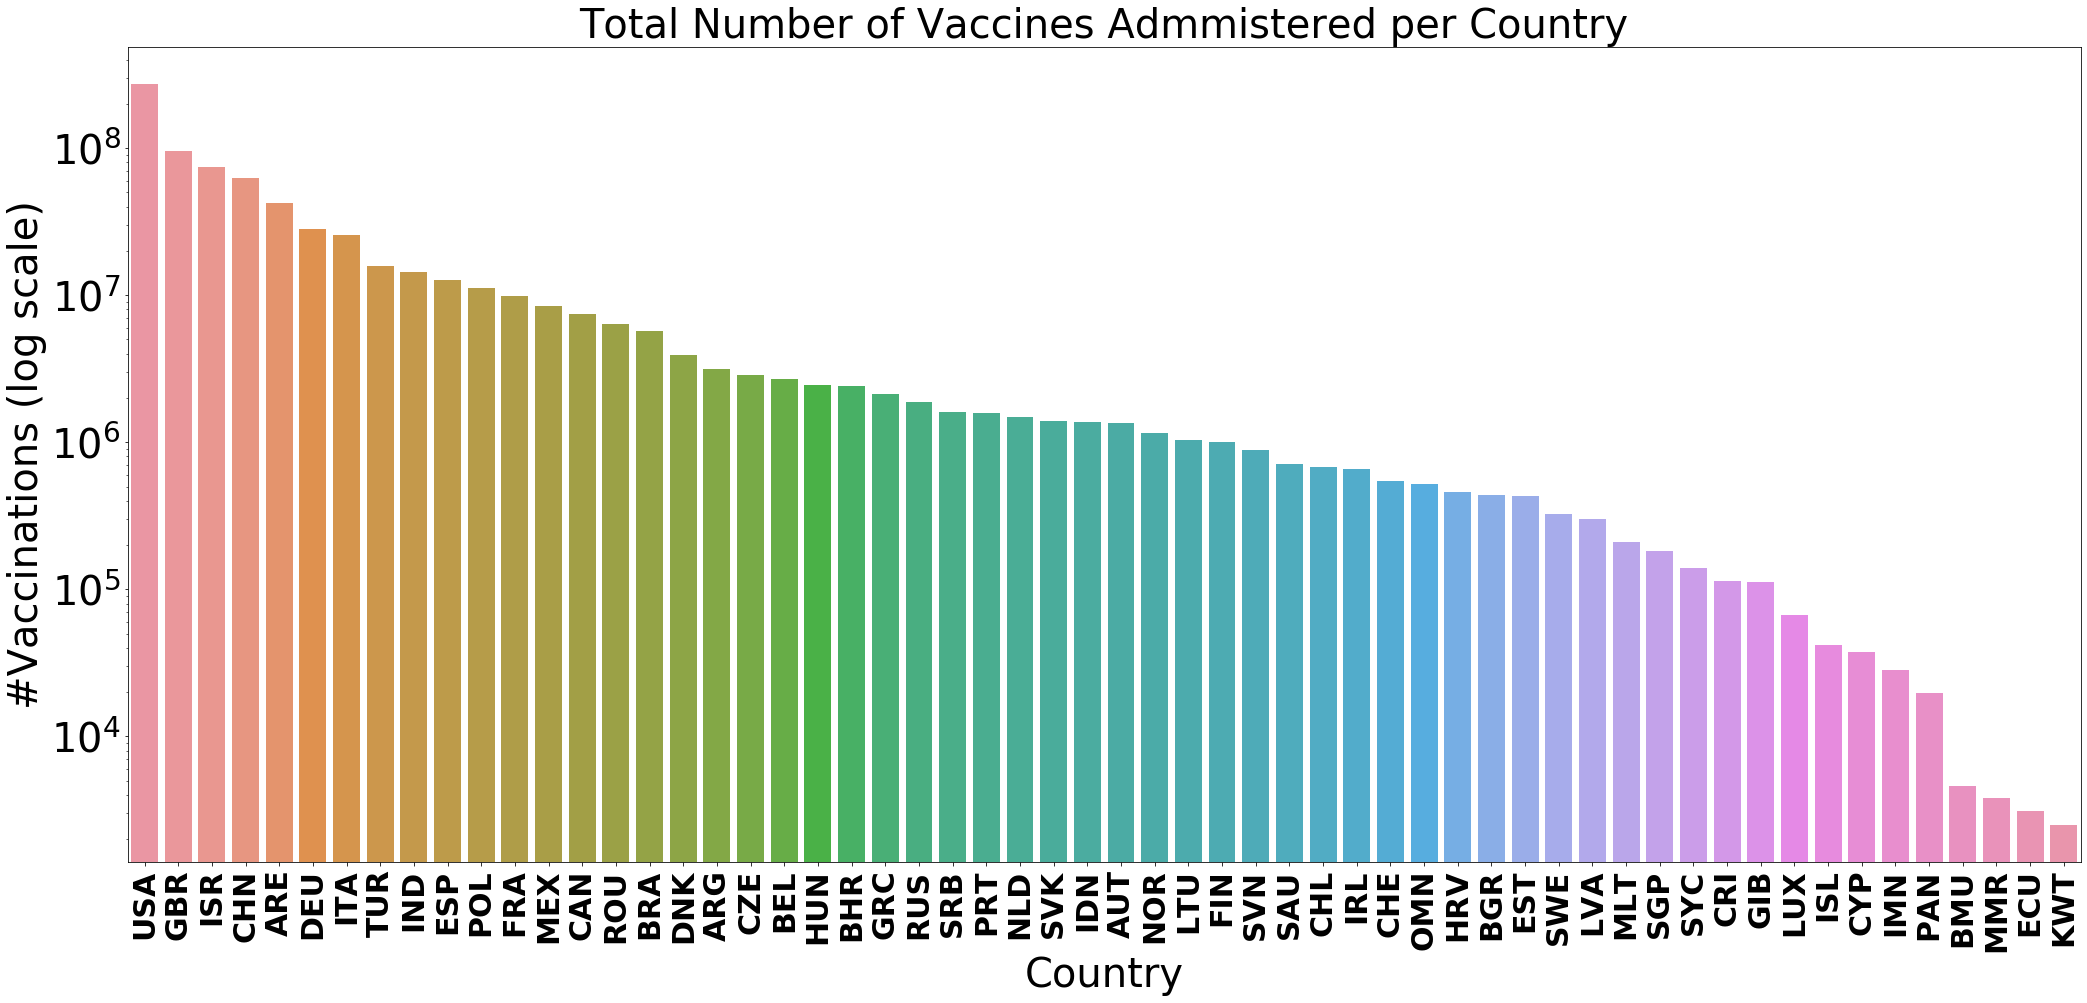

In [27]:
plot_individual(total_vaccination_by_country, "total_vaccinations", "#Vaccinations (log scale)", "Total Number of Vaccines Admmistered per Country", True, "total_vaccine")

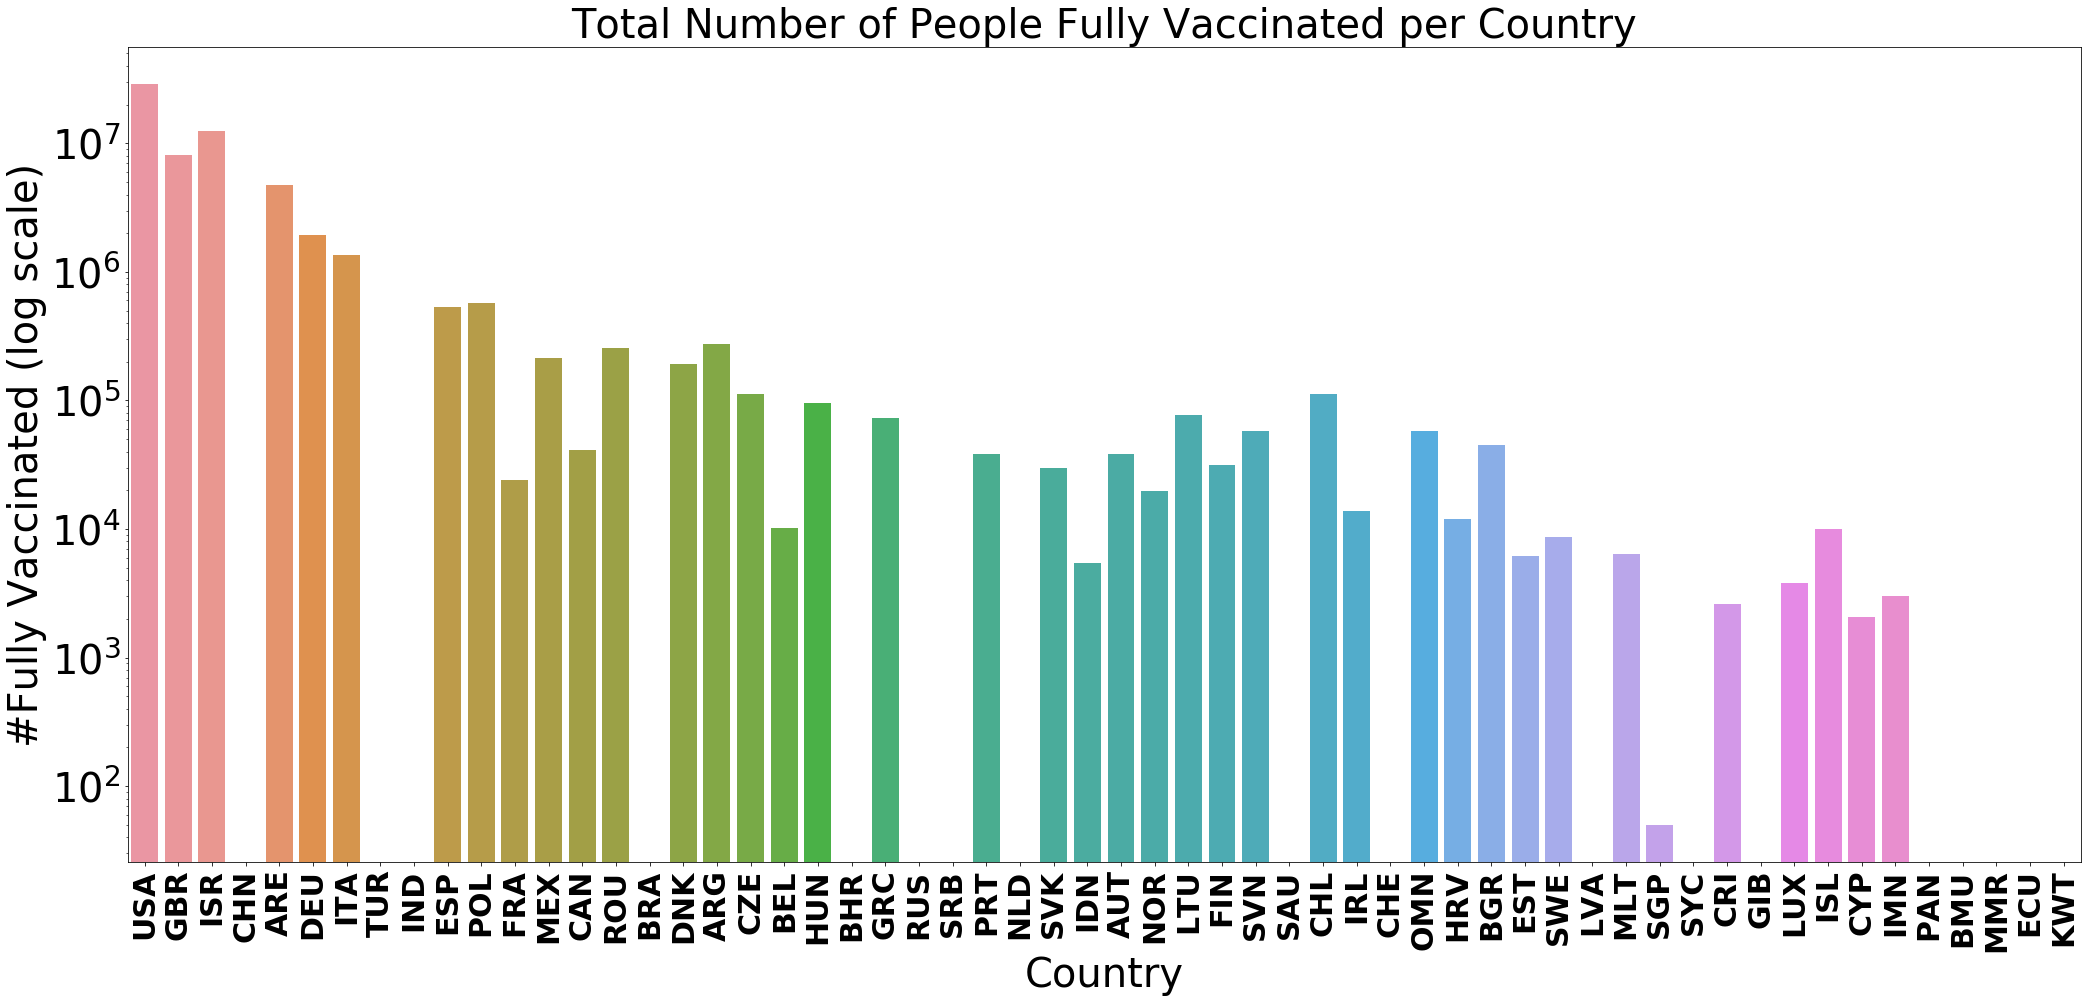

In [29]:
plot_individual(total_vaccination_by_country, "people_fully_vaccinated", "#Fully Vaccinated (log scale)", "Total Number of People Fully Vaccinated per Country", True, "total_people")